In [1]:
# prepare data for CNN_LSTM
from pandas import read_csv
from pandas import DataFrame
from numpy import array
from numpy import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt

In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# load dataset
dataset = read_csv('/content/drive/My Drive/fusedData158324.csv', header=0, index_col=0)
mean_value = dataset['vehiclecount'].mean()
dataset['vehiclecount'].fillna(value=mean_value, inplace=True)

values = dataset.values

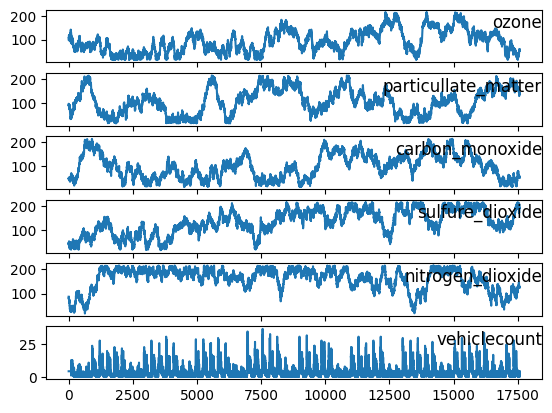

In [5]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [6]:
# ensure all data is float
values = values.astype('float32')

In [7]:
# choose a number of time steps
n_steps = 1

In [8]:
# convert into input/output
X, y = split_sequences(values, n_steps)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [9]:
# reshape the data
n_features = X.shape[2]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * n_features))

In [10]:
...
# design network
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=4, activation='relu', input_shape=(n_steps * n_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(200))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [11]:
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
141/141 - 14s - loss: 25.7230 - val_loss: 24.9961 - 14s/epoch - 97ms/step
Epoch 2/50
141/141 - 1s - loss: 23.8934 - val_loss: 24.4205 - 1s/epoch - 9ms/step
Epoch 3/50
141/141 - 1s - loss: 23.0405 - val_loss: 23.3606 - 1s/epoch - 9ms/step
Epoch 4/50
141/141 - 1s - loss: 22.1932 - val_loss: 22.2558 - 885ms/epoch - 6ms/step
Epoch 5/50
141/141 - 1s - loss: 21.1387 - val_loss: 21.6472 - 892ms/epoch - 6ms/step
Epoch 6/50
141/141 - 1s - loss: 19.9159 - val_loss: 20.4842 - 927ms/epoch - 7ms/step
Epoch 7/50
141/141 - 1s - loss: 19.0274 - val_loss: 20.2213 - 823ms/epoch - 6ms/step
Epoch 8/50
141/141 - 1s - loss: 17.8912 - val_loss: 18.3796 - 639ms/epoch - 5ms/step
Epoch 9/50
141/141 - 1s - loss: 16.8922 - val_loss: 17.8650 - 643ms/epoch - 5ms/step
Epoch 10/50
141/141 - 1s - loss: 16.5233 - val_loss: 17.9240 - 695ms/epoch - 5ms/step
Epoch 11/50
141/141 - 1s - loss: 15.8551 - val_loss: 17.2323 - 711ms/epoch - 5ms/step
Epoch 12/50
141/141 - 1s - loss: 15.5338 - val_loss: 16.9443 - 649ms/

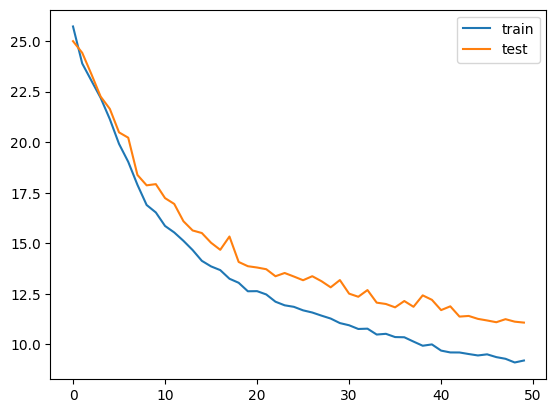

In [12]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0])

110/110 [==============================] - 1s 2ms/step


In [14]:
print("RMSE on Test Data = ", sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE on Test Data = ", metrics.mean_absolute_error(y_test, y_pred))
print("R2 on Test Data = ", metrics.r2_score(y_test, y_pred))

RMSE on Test Data =  3.3278415
MAE on Test Data =  2.3356864
R2 on Test Data =  0.5848865922287012


In [15]:
df1 = DataFrame({'Actual': y_test, 'Predicted': y_pred, 'variance': y_test - y_pred})
df1.head()

,Actual,Predicted,variance
0,0.0,0.323819,-0.323819
1,4.0,3.405923,0.594077
2,1.0,0.421313,0.578687
3,3.0,3.866307,-0.866307
4,0.0,1.601485,-1.601485


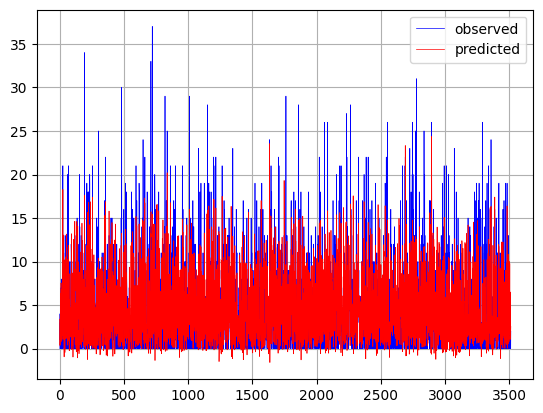

In [16]:
x_ax = range(len(x_test))
plt.plot(x_ax, y_test, lw=0.5, color='blue', label='observed')
plt.plot(x_ax, y_pred, lw=0.5, color='red', label='predicted')
plt.legend(loc='best')
plt.grid()
